# Uber Supply-Demand Gap - Assignment
1. Visually identify the most pressing problems for Uber. 
2. Identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots
3. Find out the gap between supply and demand and show the same using plots.
4. Find the time slots when the highest gap exists
5. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
6. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).
7. Recommend some ways to resolve the supply-demand gap.

In [1]:
# Import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uber_file=pd.read_csv(r".\Uber Request Data.csv")
uber_file.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [2]:
# Changing NAN to 0 for calculation 
uber_file.loc[pd.isnull(uber_file['Drop timestamp']),['Drop timestamp']]="0"

In [3]:
# Replacing "-" with "/" and making it consistent
uber_file['Request timestamp']=uber_file['Request timestamp'].apply(lambda d:d.replace("-","/"))
uber_file['Drop timestamp']=uber_file['Drop timestamp'].apply(lambda d:d.replace("-","/"))

In [4]:
# Converting datetime stamp
import datetime
def fmt_date(x):
    for fmt in ["%d/%m/%Y %H:%M:%S","%d/%m/%Y %H:%M"]:
        try:
            return datetime.datetime.strptime(x,fmt).date()
        except ValueError:
            continue
            
def fmt_time(x):
    for fmt in ["%d/%m/%Y %H:%M:%S","%d/%m/%Y %H:%M"]:
        try:
            return datetime.datetime.strptime(x,fmt).time()
        except ValueError:
            continue
            
uber_file['req_date']= uber_file['Request timestamp'].apply(fmt_date)
uber_file['req_time']= uber_file['Request timestamp'].apply(fmt_time)
uber_file['drop_date']= uber_file['Drop timestamp'].apply(fmt_date)
uber_file['drop_time']= uber_file['Drop timestamp'].apply(fmt_time)

In [5]:
#Derived variable - weekday field
import datetime
uber_file['Weekday'] = uber_file['req_date'].apply(lambda x: x.strftime('%A'))

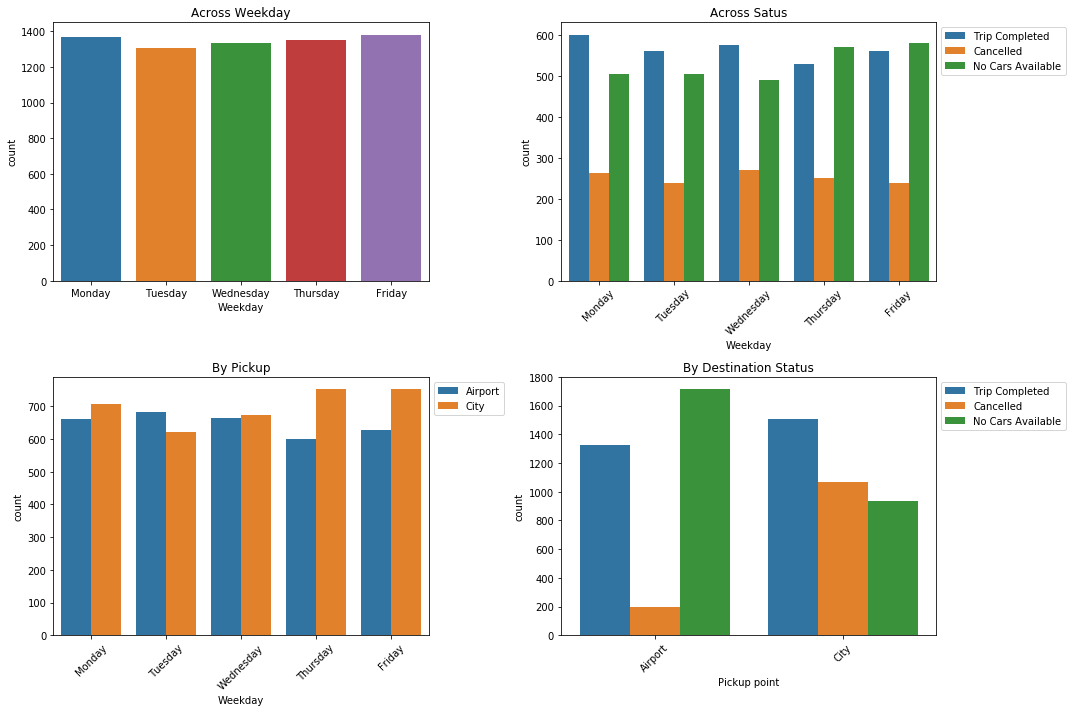

In [6]:
# Plots
plt.figure(figsize=(15, 10))

# Plotting count across weekday
plt.subplot(2, 2, 1)
plt.title("Across Weekday")
sns.countplot(x="Weekday", data=uber_file)

# Across status
plt.subplot(2, 2, 2)
plt.title("Across Satus")
sns.countplot(x="Weekday",hue="Status",data=uber_file)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))

# Across Pickup
plt.subplot(2, 2, 3)
plt.title("By Pickup")
sns.countplot(x="Weekday",hue="Pickup point",data=uber_file)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))

# Across Destination
plt.subplot(2, 2, 4)
plt.title("By Destination Status")
sns.countplot(x="Pickup point",hue="Status",data=uber_file)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

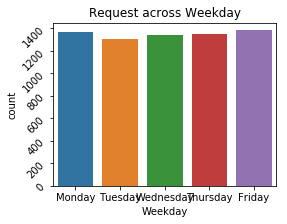

In [7]:
# Plotting count across weekday
plt.figure(figsize=(4, 3))
plt.yticks(rotation=45)
plt.title("Request across Weekday")
sns.countplot(x="Weekday", data=uber_file)

plt.show()

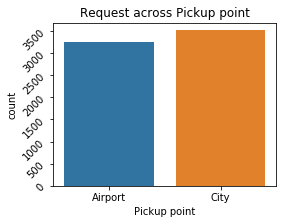

In [8]:
# Plotting count across Pickup
plt.figure(figsize=(4, 3))
plt.yticks(rotation=45)
plt.title("Request across Pickup point")
sns.countplot(x="Pickup point", data=uber_file)

plt.show()

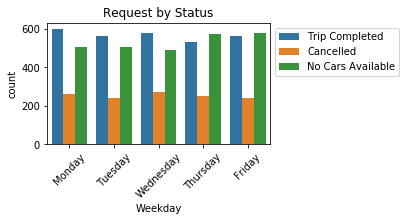

In [9]:
# Plotting count across Status
uber_file_status=uber_file.groupby(["Weekday","Status"]).size()
plt.figure(figsize=(4,3))
sns.countplot(x="Weekday",hue="Status",data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Request by Status")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

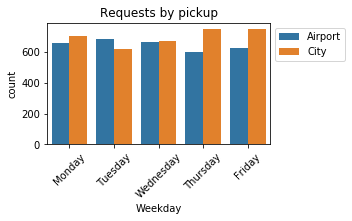

In [10]:
# Plotting count across Weekday
plt.figure(figsize=(4,3))
sns.countplot(x="Weekday",hue="Pickup point",data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Requests by pickup")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

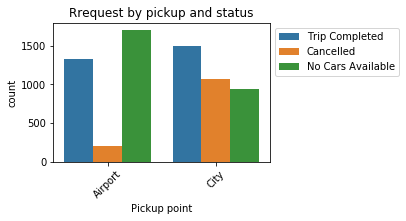

In [11]:
# Plotting count across Destination
plt.figure(figsize=(4,3))
sns.countplot(x="Pickup point",hue="Status",data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Rrequest by pickup and status")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [12]:
# Derived variable - timeofday field
# 5-8   == Early Morning
# 8-12  == Late Morning
# 12-15 == Early Afternoon
# 15-18 == Late Afternoon
# 18-21 == Evening
# 21-24 == Late Evening
# 0-5   == Night


def timeofday(x):
    currentTime=x.hour
    if((currentTime >= 5) & (currentTime < 8)):
        return 'Early Morning'
    elif((currentTime >= 8) & (currentTime < 12)):
        return 'Late Morning'
    elif((currentTime >= 12) & (currentTime < 15)):
        return 'Early Afternoon'
    elif((currentTime >= 15) & (currentTime < 18)):
        return 'Late Afternoon'
    elif((currentTime >= 18) & (currentTime < 21)):
        return 'Evening'
    elif((currentTime >= 21) & (currentTime < 24)):
        return 'Late Evening'
    elif((currentTime >= 0) & (currentTime < 5)):
        return 'Night'
    
uber_file['timeofday']= uber_file['req_time'].apply(timeofday)

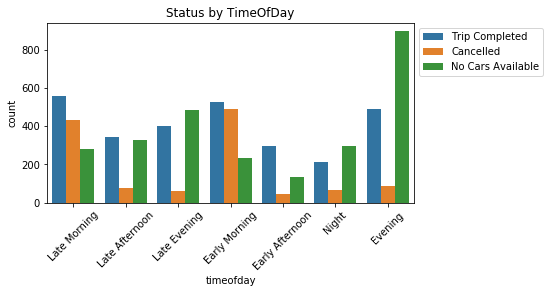

In [13]:
# Plotting count across timeofday
plt.figure(figsize=(6,4))
sns.countplot(x="timeofday",hue="Status",data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Status by TimeOfDay")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

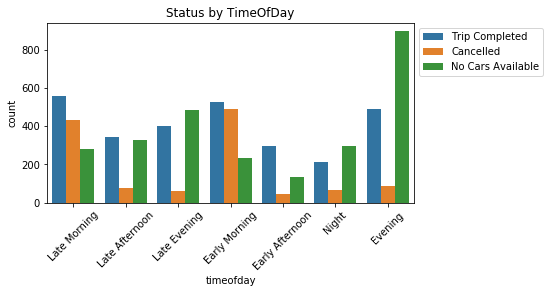

In [14]:
# Plotting timeofday by Status
plt.figure(figsize=(6,4))
sns.countplot(x="timeofday",hue="Status", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Status by TimeOfDay")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

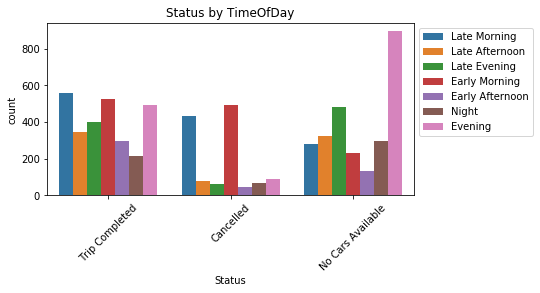

In [15]:
# Plotting Status by timeofday
plt.figure(figsize=(6,4))
sns.countplot(x="Status",hue="timeofday", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Status by TimeOfDay")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [16]:
# Derived variable - demandmet field
# Yes == Trip Completed
# No == Canceclled or No Cars Available
def demandmet(s):
    if(s=="Trip Completed"):
        return 'Yes'
    else:
        return 'No'
    
uber_file['Demand Met']=uber_file['Status'].apply(demandmet)

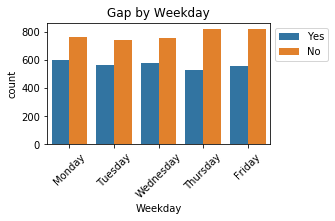

In [17]:
# Supply-Demand Gap on Weekday
plt.figure(figsize=(4,3))
sns.countplot(x="Weekday",hue="Demand Met", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by Weekday")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

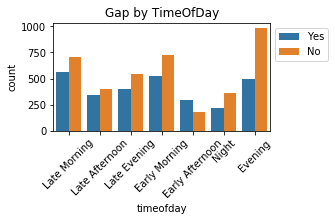

In [18]:
# Supply-Demand Gap on timeofday
plt.figure(figsize=(4,3))
sns.countplot(x="timeofday",hue="Demand Met", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by TimeOfDay")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

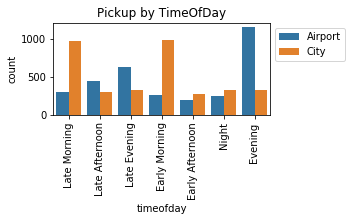

In [19]:
# Pickup by timeofday
plt.figure(figsize=(4,3))
sns.countplot(x="timeofday",hue="Pickup point", data=uber_file)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Pickup by TimeOfDay")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

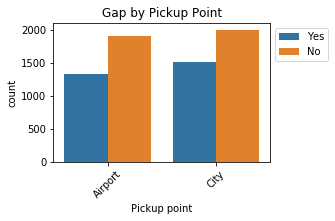

In [20]:
# Supply-Demand Gap on Pickup
plt.figure(figsize=(4,3))
sns.countplot(x="Pickup point",hue="Demand Met", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by Pickup Point")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [21]:
# Create a subset for Late Evening and Evening
uber_file_evenings = uber_file.loc[(uber_file['timeofday']=="Late Evening") | (uber_file['timeofday']=="Evening")]

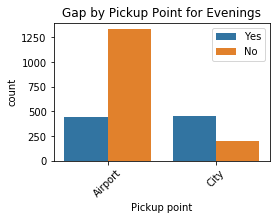

In [22]:
# Supply-Demand Gap in Evening based on Pickup point
plt.figure(figsize=(4,3))
sns.countplot(x="Pickup point",hue="Demand Met", data=uber_file_evenings)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by Pickup Point for Evenings")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

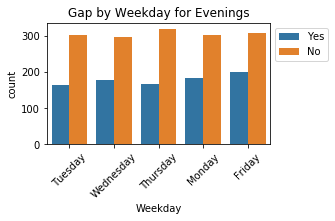

In [23]:
# Supply-Demand Gap on Weekday for Evenings
plt.figure(figsize=(4,3))
sns.countplot(x="Weekday",hue="Demand Met", data=uber_file_evenings)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by Weekday for Evenings")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

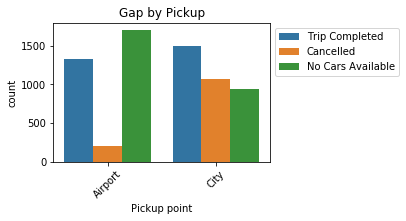

In [24]:
# Supply-Demand Gap by Pickup
plt.figure(figsize=(4,3))
sns.countplot(x="Pickup point",hue="Status", data=uber_file)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Gap by Pickup")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()